# Sentiment dataset

Importar las librerias 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from gensim import models
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
import seaborn as sns
from sklearn import preprocessing
import pickle
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from wordcloud import WordCloud
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Cargamos el dataset

In [52]:
df = pd.read_csv('Tuit_G.csv')
df

,Unnamed: 0,Target,Id,Date,Flag,User,Text
0,0,0,2008243036,Tue Jun 02 13:50:13 PDT 2009,NO_QUERY,lost_dog,@ryanhickman I am lost. Please help me find a ...
1,1,0,2007057778,Tue Jun 02 12:05:01 PDT 2009,NO_QUERY,lost_dog,@doodledreamerx I am lost. Please help me find...
2,2,0,2008243689,Tue Jun 02 13:50:17 PDT 2009,NO_QUERY,lost_dog,@walteralph I am lost. Please help me find a g...
3,3,0,2321445062,Wed Jun 24 21:03:57 PDT 2009,NO_QUERY,lost_dog,@Paigejac I am lost. Please help me find a goo...
4,4,0,2266044959,Sun Jun 21 07:48:03 PDT 2009,NO_QUERY,lost_dog,@ollielu I am lost. Please help me find a good...
...,...,...,...,...,...,...,...
9995,9995,4,2002442167,Tue Jun 02 04:13:33 PDT 2009,NO_QUERY,paul_steele,@MissKemi am training hard for my challenge an...
9996,9996,0,1833742442,Mon May 18 00:18:00 PDT 2009,NO_QUERY,paul_steele,"@AnotherJulia yes, know what u mean u never k..."
9997,9997,4,1974150706,Sat May 30 12:32:37 PDT 2009,NO_QUERY,paul_steele,@gypsyjean a little erm scary eh? hi
9998,9998,4,2002123728,Tue Jun 02 03:13:13 PDT 2009,NO_QUERY,paul_steele,"@elliethompsett hello there, yes back online n..."


# Representacion de los datos

Vamos a representar el conjunto de datos en un diagrama de sectores segun la polaridad de los tweets y el Wordcloud teniendo en cuenta las palabras mas frecuentes

In [53]:
# Conseguimos la columna target en un array
target_values = df['Target']
print(len(target_values))
target_values
arr = np.array(target_values)

10000


In [54]:
# Numero apariciones tweets negativos (target=0)
negative_len = (arr==0).sum()
negative_len

4043

In [55]:
# Numero apariciones tweets positivos (target=4)
positive_len = (arr==4).sum()
positive_len

5957

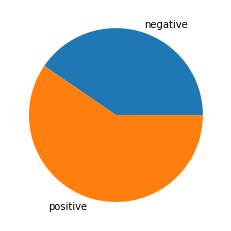

In [56]:
# Diagrama de sectores con la polaridad de los tweets
targets=['negative','positive']
target_counter=[negative_len,positive_len]
plt.pie(target_counter,labels=targets)
plt.show()

(-0.5, 1799.5, 1399.5, -0.5)

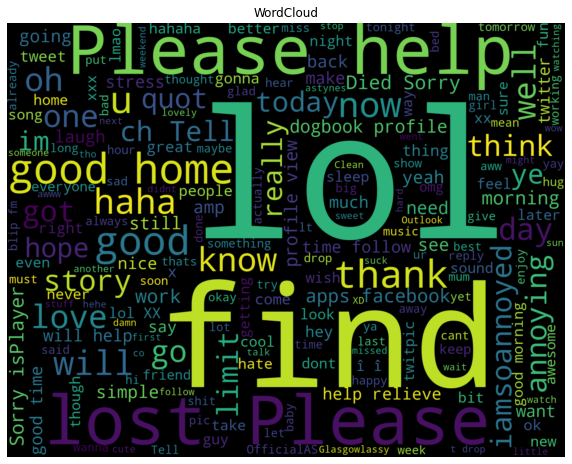

In [57]:
# Wordcloud a partir de los tweets
wc = WordCloud(background_color='black',width=1800,height=1400).generate(' '.join(df['Text']))
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.title("WordCloud")
plt.axis("off")

# Representacion del texto


Vectorizacion con tf-idf

In [58]:
tweets = np.array(df["Text"])
print(len(tweets))
vectorizer = TfidfVectorizer(min_df = 200,stop_words='english') 
train_bow = vectorizer.fit_transform(tweets)
print("Tamaño de los datos depues de aplicar TF-IDF : ",train_bow.shape)

10000
Tamaño de los datos depues de aplicar TF-IDF :  (10000, 44)


In [59]:
df_tfidf = pd.DataFrame(train_bow.todense(), columns=vectorizer.get_feature_names())
df_tfidf["Target"] = df["Target"] 
df.dropna(inplace=True) 

In [60]:
df_tfidf.to_csv('df_tfidf.csv',index=False)

In [61]:
df_tfidf

,140,annoying,ch,clean,com,day,died,don,drop,facebook,...,tell,thanks,think,time,today,www,xx,yeah,yes,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484455,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,4


In [87]:
df_tfidf.shape

(10000, 45)

Document Embeddings

In [62]:
zerrenda = [str(i) for i in df['Text'].copy().array]
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(zerrenda)]
model = Doc2Vec(documents=tagged_data, min_count=200,vector_size = 300,workers = 5)

In [63]:
model_300 = get_tmpfile("my_doc2vec_model_300")
model.save(model_300)
model.save("doc_2vec_model")
model = Doc2Vec.load("doc_2vec_model")

In [64]:
df_de = pd.DataFrame(columns=list(range(300)),index=list(range(10000)))
tagged_df = pd.Series( (v[0] for v in tagged_data))
cosas = tagged_df.apply(model.infer_vector)
for i in range(df.shape[0]):
    df_de.loc[i] = pd.Series(cosas[i])

In [65]:
df_de.to_csv("df_200de.csv",index=False)

In [66]:
df_de

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000434,-0.009577,0.007167,-0.003936,0.008152,-0.009968,-0.004574,0.011424,-0.006251,0.008231,...,0.004295,0.012924,0.016438,0.004944,0.003452,0.001322,0.006759,0.001041,0.015664,-0.007546
1,-0.015784,0.012774,0.01024,-0.004525,0.007043,-0.019906,0.00452,0.052037,0.003139,-0.001738,...,0.003558,0.042206,0.017895,0.021457,0.039373,0.037353,0.003554,0.00066,0.030678,-0.021932
2,0.001533,-0.01348,-0.009338,-0.00538,0.005558,-0.001753,-0.003318,-0.002287,-0.006305,-0.002541,...,0.00234,-0.000042,0.007737,0.001101,0.005507,-0.010153,0.004934,0.001259,0.004174,-0.00718
3,-0.002407,0.004353,0.017015,-0.002816,0.012816,-0.022882,0.007189,0.039509,-0.008603,0.010357,...,0.006088,0.032126,0.017126,0.021637,0.025092,0.027076,0.011009,0.00159,0.036785,-0.013966
4,0.013248,-0.018598,-0.010361,-0.000846,0.001394,-0.000314,-0.001977,-0.025294,-0.006726,0.009161,...,0.000231,-0.017224,-0.002981,-0.003285,-0.012614,-0.028079,0.00646,-0.003977,0.000424,-0.000229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.020632,-0.016163,-0.013302,-0.006106,0.015975,-0.01632,0.002857,0.000792,-0.030566,-0.003629,...,0.017699,-0.009919,-0.001664,0.01483,0.009119,0.004317,0.011662,-0.013812,0.018652,-0.017599
9996,-0.024216,0.01377,0.017546,-0.010897,0.003092,0.000181,0.01567,0.033944,0.006164,0.001533,...,-0.008022,0.038632,0.012946,0.019432,0.017763,0.036872,0.007475,0.014828,0.022495,-0.019649
9997,-0.00187,0.006501,0.022323,0.00458,0.011467,-0.021813,0.003304,0.043201,-0.005708,0.013591,...,0.001039,0.034903,0.013472,0.017629,0.025752,0.033539,0.01488,0.003185,0.0295,-0.018603
9998,-0.004946,-0.003055,0.016287,-0.009921,0.005564,-0.015545,-0.005186,0.035748,-0.009519,0.009381,...,0.015003,0.031618,0.023476,0.020232,0.018365,0.026638,0.004563,-0.008767,0.044566,-0.01646


In [83]:
df_de["Target"] = df["Target"]

In [84]:
df_de.to_csv("df_200de.csv",index=False)

In [85]:
df_de

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Target
0,0.000434,-0.009577,0.007167,-0.003936,0.008152,-0.009968,-0.004574,0.011424,-0.006251,0.008231,...,0.012924,0.016438,0.004944,0.003452,0.001322,0.006759,0.001041,0.015664,-0.007546,0
1,-0.015784,0.012774,0.01024,-0.004525,0.007043,-0.019906,0.00452,0.052037,0.003139,-0.001738,...,0.042206,0.017895,0.021457,0.039373,0.037353,0.003554,0.00066,0.030678,-0.021932,0
2,0.001533,-0.01348,-0.009338,-0.00538,0.005558,-0.001753,-0.003318,-0.002287,-0.006305,-0.002541,...,-0.000042,0.007737,0.001101,0.005507,-0.010153,0.004934,0.001259,0.004174,-0.00718,0
3,-0.002407,0.004353,0.017015,-0.002816,0.012816,-0.022882,0.007189,0.039509,-0.008603,0.010357,...,0.032126,0.017126,0.021637,0.025092,0.027076,0.011009,0.00159,0.036785,-0.013966,0
4,0.013248,-0.018598,-0.010361,-0.000846,0.001394,-0.000314,-0.001977,-0.025294,-0.006726,0.009161,...,-0.017224,-0.002981,-0.003285,-0.012614,-0.028079,0.00646,-0.003977,0.000424,-0.000229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.020632,-0.016163,-0.013302,-0.006106,0.015975,-0.01632,0.002857,0.000792,-0.030566,-0.003629,...,-0.009919,-0.001664,0.01483,0.009119,0.004317,0.011662,-0.013812,0.018652,-0.017599,4
9996,-0.024216,0.01377,0.017546,-0.010897,0.003092,0.000181,0.01567,0.033944,0.006164,0.001533,...,0.038632,0.012946,0.019432,0.017763,0.036872,0.007475,0.014828,0.022495,-0.019649,0
9997,-0.00187,0.006501,0.022323,0.00458,0.011467,-0.021813,0.003304,0.043201,-0.005708,0.013591,...,0.034903,0.013472,0.017629,0.025752,0.033539,0.01488,0.003185,0.0295,-0.018603,4
9998,-0.004946,-0.003055,0.016287,-0.009921,0.005564,-0.015545,-0.005186,0.035748,-0.009519,0.009381,...,0.031618,0.023476,0.020232,0.018365,0.026638,0.004563,-0.008767,0.044566,-0.01646,4


In [86]:
df_de.shape

(10000, 301)

# Regresion Logistica

Regresion logistica con tf-idf

Antes de hacer nada, necesitamos tener los conjuntos de test y train

In [67]:
x = df_tfidf.drop(["Target"],axis=1,inplace=False)

In [68]:
x

,140,annoying,ch,clean,com,day,died,don,drop,facebook,...,story,tell,thanks,think,time,today,www,xx,yeah,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484455
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [69]:
label_encoder = preprocessing.LabelEncoder().fit(df_tfidf["Target"])

In [70]:
y = label_encoder.transform(df_tfidf["Target"])

In [122]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=12)

Verificar cuales son los mejores atributos 

In [123]:
score = []
onena = 0
values = []
aux = 0

for i in range(3,44,1):
    best_features = SelectKBest(k=i)
    fit = best_features.fit(x_train,np.ravel(y_train))
    df_new = df_tfidf[x.columns[fit.get_support()]]
    LR = LogisticRegression(max_iter=300,solver="saga")
    cv = KFold(n_splits=5)
    yhat = cross_val_predict(LR, df_new, y,cv=cv)
    score_aux = metrics.f1_score(y, yhat,average='weighted')
    if (score_aux>onena):
        onena=score_aux
        iter_num = i
        bestFeatures = df_new
    score.append(score2)
    values.append(i)
    Valor = 'i: ' + str(i) + ' -> value: ' + str(score_aux) 
    print(Valor)

i: 3 -> value: 0.44579932959039753
i: 4 -> value: 0.4463942123154491
i: 5 -> value: 0.44614015949740854
i: 6 -> value: 0.4542592808614796
i: 7 -> value: 0.45503328579815117
i: 8 -> value: 0.5220024036030332
i: 9 -> value: 0.5739365109901798
i: 10 -> value: 0.6619293670418062
i: 11 -> value: 0.6613888989323378
i: 12 -> value: 0.649353865708773
i: 13 -> value: 0.649353865708773
i: 14 -> value: 0.649353865708773
i: 15 -> value: 0.6624934443560748
i: 16 -> value: 0.6626603713723594
i: 17 -> value: 0.6630538533437158
i: 18 -> value: 0.6631373371084873
i: 19 -> value: 0.6631373371084873
i: 20 -> value: 0.6498293701996378
i: 21 -> value: 0.6632010597218484
i: 22 -> value: 0.6617386783979671
i: 23 -> value: 0.6617386783979671
i: 24 -> value: 0.6614445220588235
i: 25 -> value: 0.6495399713760633
i: 26 -> value: 0.6494778202503505
i: 27 -> value: 0.6497260528332834
i: 28 -> value: 0.6495814532646911
i: 29 -> value: 0.6757190644985159
i: 30 -> value: 0.6753215249462459
i: 31 -> value: 0.674104905

In [124]:
best = 'MAX i: ' + str(iter_num) + ' -> MAX value: ' + str(max_score) 
print(best)

MAX i: 41 -> MAX value: 0.6779992755229456


LR with  41 0.6780165118655862


/home/portatil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/portatil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


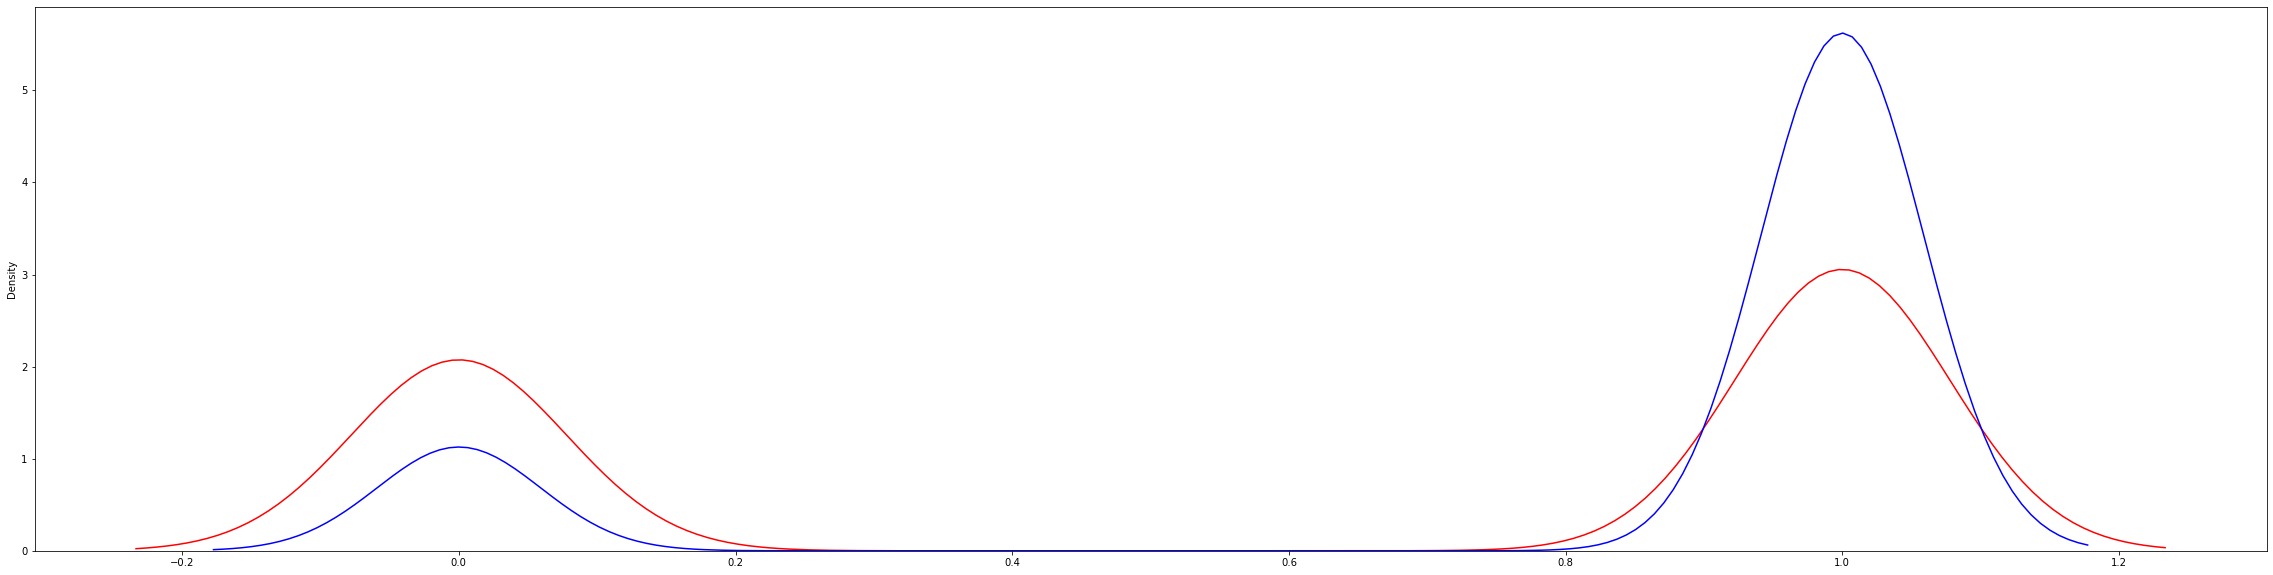

In [125]:
LR = LogisticRegression(max_iter=100,solver="saga")
cv = KFold(n_splits=5)
yhat = cross_val_predict(LR, bestFeatures, y,cv=cv)

print("LR with ",41,metrics.f1_score(y, yhat,average='weighted'))

plt.figure(figsize=(40, 10))
sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values")

plt.show()
plt.close()

Regresion logistica con document embeddings

In [44]:
df_de

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.005127,-0.005699,0.004301,0.002121,0.002169,-0.017009,-0.00322,0.009763,-0.014333,0.003118,...,0.011186,0.014314,0.00625,0.00805,0.021726,0.004675,0.007793,-0.009951,0.019849,-0.007039
1,0.007185,-0.009963,-0.007093,-0.002135,0.006288,-0.007137,0.005633,-0.008847,-0.003095,0.005595,...,-0.000998,-0.00548,0.005319,-0.001688,-0.001194,-0.010892,0.007092,0.001282,0.005232,-0.007707
2,0.019349,-0.021316,-0.002096,-0.005998,-0.000636,-0.010682,-0.016625,-0.033737,-0.018416,-0.000481,...,0.015176,-0.012356,0.003645,-0.007793,-0.000185,-0.021696,0.006558,-0.009239,-0.007496,-0.000614
3,-0.006558,0.014111,0.017739,0.00979,0.003449,-0.032128,0.009516,0.060944,-0.013106,0.007481,...,0.017727,0.041057,0.019031,0.018895,0.049265,0.038367,0.013358,-0.008339,0.051185,-0.015748
4,0.000081,-0.007896,0.007638,0.003023,0.002849,-0.021016,0.004493,0.018849,-0.013315,0.002647,...,0.015142,0.019646,0.016454,0.009962,0.032166,0.005387,0.017699,-0.004934,0.035812,-0.0119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.001686,-0.006186,-0.008364,0.001244,0.012321,-0.017381,0.009075,0.023222,-0.019636,0.003558,...,0.011119,0.018484,0.003608,0.0107,0.022043,0.014803,0.014734,-0.012243,0.02926,-0.023815
9996,-0.02223,0.00294,0.027151,-0.004636,0.001401,-0.013915,-0.000488,0.039904,-0.016076,0.015053,...,0.019256,0.048539,0.03578,0.021013,0.038002,0.034235,0.015292,0.015754,0.039799,-0.021389
9997,0.004177,-0.008259,0.005105,0.005442,0.007271,-0.024048,0.002926,0.027193,-0.014913,0.017514,...,0.010563,0.028626,0.025595,0.015133,0.024575,0.016287,0.017262,-0.004843,0.03775,-0.018416
9998,-0.011617,0.001507,0.008879,0.001527,-0.002174,-0.007843,-0.006996,0.043264,-0.005249,0.024171,...,0.01234,0.042364,0.028667,0.016407,0.030169,0.029131,0.013625,-0.006673,0.05538,-0.021974


In [126]:
x2 = df_de.drop("Target",axis=1,inplace=False)

In [127]:
label_encoder = preprocessing.LabelEncoder().fit(df_de['Target'])

In [128]:
y2 = label_encoder.transform(df_de['Target'])

Logisticc regression's R2: with  41 0.5558738743396652


/home/portatil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/portatil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


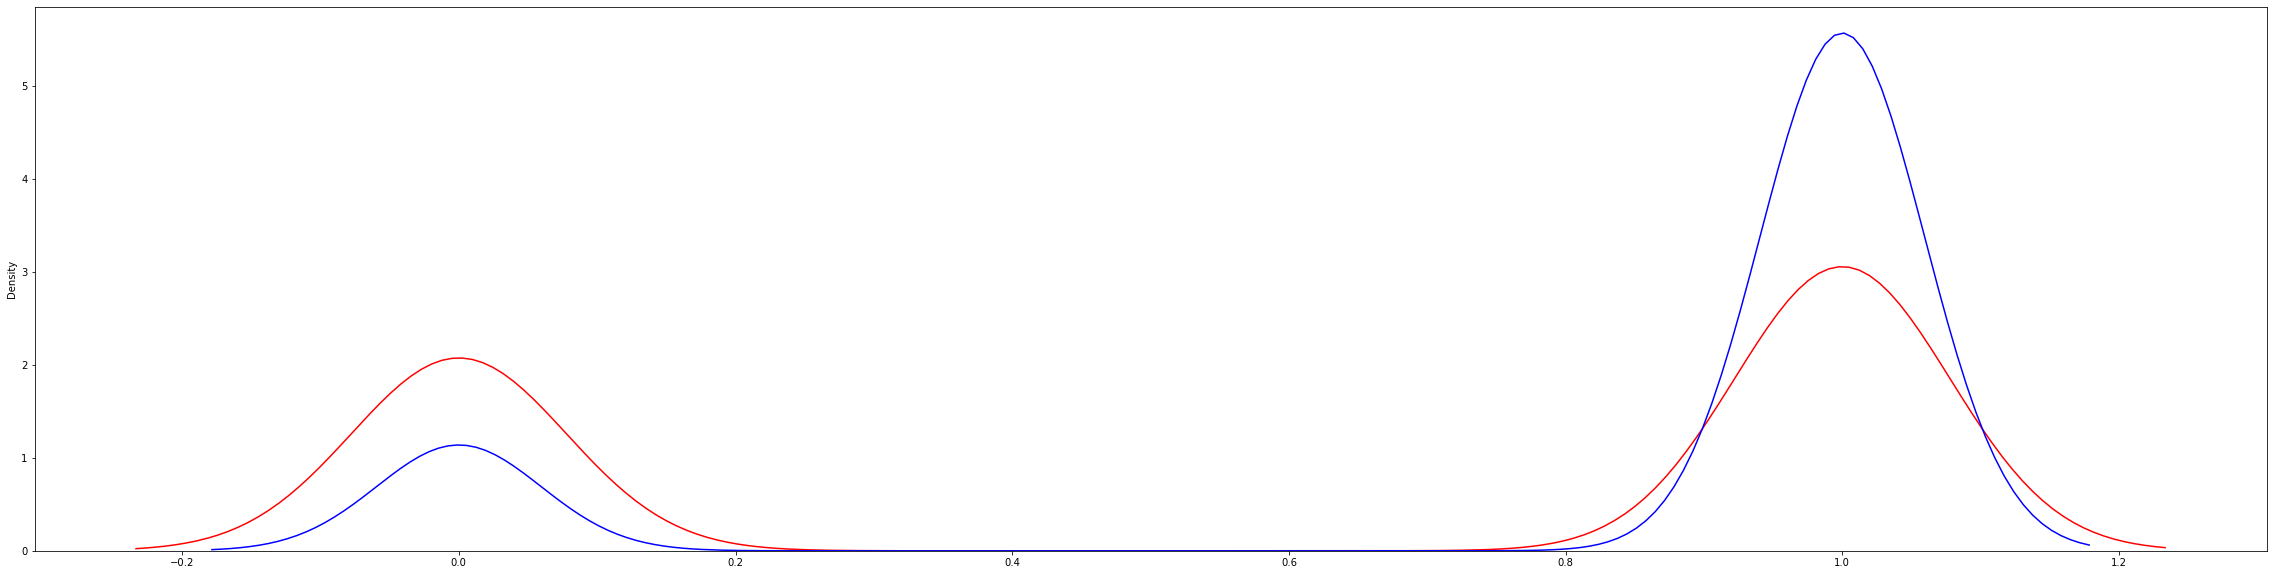

In [129]:
LR = LogisticRegression(max_iter=500,solver="saga")
cv = KFold(n_splits=10)
yhat = cross_val_predict(LR, x2, y2,cv=cv)

print("Logisticc regression's R2: with ",41,metrics.f1_score(y, yhat,average='weighted'))

plt.figure(figsize=(40, 10))
sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values")

plt.show()
plt.close()

# Perceptron simple

In [99]:
x_noTarget = df_tfidf.drop(["Target"],axis=1,inplace=False)
x_noTarget

,140,annoying,ch,clean,com,day,died,don,drop,facebook,...,story,tell,thanks,think,time,today,www,xx,yeah,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484455
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [105]:
target = np.ravel(df_tfidf.filter(items=["Target"]))

In [106]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x_noTarget, target, test_size=0.2, random_state=13)

In [140]:
score = []
onena = 0
values = []
aux = 0

for i in range(3,44,1):
    best_features = SelectKBest(k=i)
    fit = best_features.fit(x3_train, np.ravel(y3_train))
    df_new = df_tfidf[x_noTarget.columns[fit.get_support()]]
    perceptron = Perceptron(max_iter=500,eta0=1.0)
    cv = KFold(n_splits=10)
    yhat = cross_val_predict(perceptron, df_new, y, cv=cv)
    score2 = metrics.f1_score(y, yhat, average='weighted')
    if (score2>max_score):
        max_score=score2
        aux = i
        bestFeatures = df_new
    score.append(score2)
    values.append(i)
    Valor = 'i: ' + str(i) + ' -> value: ' + str(score2) 
    print(Valor)

i: 3 -> value: 0.4176336653353767
i: 4 -> value: 0.48784547269202355
i: 5 -> value: 0.517186060580663
i: 6 -> value: 0.5174176260192336
i: 7 -> value: 0.5503744564463219
i: 8 -> value: 0.558647702315479
i: 9 -> value: 0.5420739263538933
i: 10 -> value: 0.5354357051387479
i: 11 -> value: 0.5199319459982743
i: 12 -> value: 0.48503261173043094
i: 13 -> value: 0.5337357974312256
i: 14 -> value: 0.5393882653841506
i: 15 -> value: 0.5066768239999779
i: 16 -> value: 0.5772935135430912
i: 17 -> value: 0.536216335898549
i: 18 -> value: 0.6497147559994666
i: 19 -> value: 0.5161648568450221
i: 20 -> value: 0.5009333507084489
i: 21 -> value: 0.47995200933028975
i: 22 -> value: 0.5360700318801456
i: 23 -> value: 0.5617020083364099
i: 24 -> value: 0.5541512300992807
i: 25 -> value: 0.5307412643876251
i: 26 -> value: 0.5814205831422508
i: 27 -> value: 0.6179447447491179
i: 28 -> value: 0.5199348270845292
i: 29 -> value: 0.6346000299403306
i: 30 -> value: 0.5872843313930495
i: 31 -> value: 0.564237204

In [141]:
m_score = 'MAX i: ' + str(aux) + ' -> MAX value: ' + str(max_score) 
print(m_score)

MAX i: 0 -> MAX value: 0.6779992755229456


In [142]:
model = Perceptron(max_iter=500, eta0=1.0)
model.fit(x3_train, y3_train)

Perceptron(max_iter=500)

In [143]:
y3_pred = model.predict(x3_test)

In [144]:
classificationReport = classification_report(y3_test,y3_pred)

In [145]:
print(classificationReport)

              precision    recall  f1-score   support

           0       0.47      0.95      0.63       801
           4       0.90      0.27      0.41      1199

    accuracy                           0.54      2000
   macro avg       0.68      0.61      0.52      2000
weighted avg       0.72      0.54      0.50      2000



In [146]:
confusionMatrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

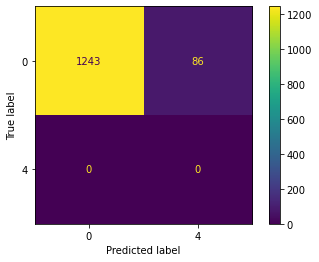

In [147]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=model.classes_)
cm.plot()

# Perceptron simple con document embeddings

In [115]:
x2

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000434,-0.009577,0.007167,-0.003936,0.008152,-0.009968,-0.004574,0.011424,-0.006251,0.008231,...,0.004295,0.012924,0.016438,0.004944,0.003452,0.001322,0.006759,0.001041,0.015664,-0.007546
1,-0.015784,0.012774,0.01024,-0.004525,0.007043,-0.019906,0.00452,0.052037,0.003139,-0.001738,...,0.003558,0.042206,0.017895,0.021457,0.039373,0.037353,0.003554,0.00066,0.030678,-0.021932
2,0.001533,-0.01348,-0.009338,-0.00538,0.005558,-0.001753,-0.003318,-0.002287,-0.006305,-0.002541,...,0.00234,-0.000042,0.007737,0.001101,0.005507,-0.010153,0.004934,0.001259,0.004174,-0.00718
3,-0.002407,0.004353,0.017015,-0.002816,0.012816,-0.022882,0.007189,0.039509,-0.008603,0.010357,...,0.006088,0.032126,0.017126,0.021637,0.025092,0.027076,0.011009,0.00159,0.036785,-0.013966
4,0.013248,-0.018598,-0.010361,-0.000846,0.001394,-0.000314,-0.001977,-0.025294,-0.006726,0.009161,...,0.000231,-0.017224,-0.002981,-0.003285,-0.012614,-0.028079,0.00646,-0.003977,0.000424,-0.000229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.020632,-0.016163,-0.013302,-0.006106,0.015975,-0.01632,0.002857,0.000792,-0.030566,-0.003629,...,0.017699,-0.009919,-0.001664,0.01483,0.009119,0.004317,0.011662,-0.013812,0.018652,-0.017599
9996,-0.024216,0.01377,0.017546,-0.010897,0.003092,0.000181,0.01567,0.033944,0.006164,0.001533,...,-0.008022,0.038632,0.012946,0.019432,0.017763,0.036872,0.007475,0.014828,0.022495,-0.019649
9997,-0.00187,0.006501,0.022323,0.00458,0.011467,-0.021813,0.003304,0.043201,-0.005708,0.013591,...,0.001039,0.034903,0.013472,0.017629,0.025752,0.033539,0.01488,0.003185,0.0295,-0.018603
9998,-0.004946,-0.003055,0.016287,-0.009921,0.005564,-0.015545,-0.005186,0.035748,-0.009519,0.009381,...,0.015003,0.031618,0.023476,0.020232,0.018365,0.026638,0.004563,-0.008767,0.044566,-0.01646


In [116]:
y2

array([0, 0, 0, ..., 1, 1, 1])

In [131]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2,random_state=45)

In [132]:
model = Perceptron(max_iter=1000, eta0=1.0)
model.fit(x2_train, y2_train)

Perceptron()

In [133]:
y2_pred = model.predict(x2_test)

In [134]:
classificationReport = classification_report(y2_test, y2_pred)

In [135]:
print(classificationReport)

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       786
           1       0.71      0.77      0.74      1214

    accuracy                           0.67      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.67      0.67      0.67      2000



In [148]:
confusionMatrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

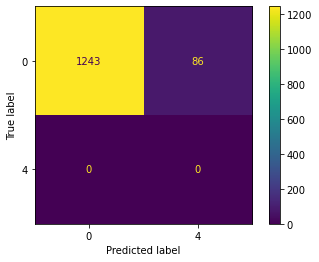

In [149]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=model.classes_)
cm.plot()